In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
#Orders

data = pd.read_csv('/Users/fabianbrockstedt/neuefische/EDA_Project/Data/Muesli Project raw datas.csv')

data.columns = data.columns.str.lower() 

data = data.drop_duplicates()

data.head()

,index,order id,order date,ship mode,customer id,customer name,origin channel,country/region,city,state,postal code,region,category,sub-category,product id,sales,quantity,discount,profit
0,27,CA-2019-121755,16/1/2019,Second Class,EH-13945,Eric Hoffmann,Email,United States,Los Angeles,California,90049.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10003027,"90,57",3,0,"11,7741"
1,45,CA-2019-118255,11/3/2019,First Class,ON-18715,Odella Nelson,Sales,United States,Eagan,Minnesota,55122.0,Central,Special Projects Muesil,Gluten Free,TEC-AC-10000171,"45,98",2,0,"19,7714"
2,48,CA-2019-169194,20/6/2019,Standard Class,LH-16900,Lena Hernandez,Email,United States,Dover,Delaware,19901.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,45,3,0,"4,95"
3,60,CA-2019-111682,17/6/2019,First Class,TB-21055,Ted Butterfield,Email,United States,Troy,New York,12180.0,East,Special Projects Muesil,Gluten Free,TEC-AC-10002167,30,2,0,"3,3"
4,63,CA-2018-135545,24/11/2018,Standard Class,KM-16720,Kunst Miller,Email,United States,Los Angeles,California,90004.0,West,Special Projects Muesil,Gluten Free,TEC-AC-10004633,"13,98",2,0,"6,1512"


In [79]:
#Order process data

data1 = pd.read_csv('/Users/fabianbrockstedt/neuefische/EDA_Project/Data/Muesli Project raw data1.csv')

data1 = data1.drop_duplicates()

data1.columns = data1.columns.str.lower() 

data1.head()


,row id,order id,order date,on truck scan date,ship mode
0,646,CA-2020-126221,30/12/2020,06/01/2021,Standard Processing
1,907,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
2,908,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
3,909,CA-2020-143259,30/12/2020,06/01/2021,Standard Processing
4,1297,CA-2020-115427,30/12/2020,06/01/2021,Standard Processing


In [119]:
#InternData Study

data2 = pd.read_csv('/Users/fabianbrockstedt/neuefische/EDA_Project/Data/Muesli Project raw data2.csv')

data2 = data2.drop_duplicates()

data2.columns = data2.columns.str.lower() 

data2.head()


,order id,ready to ship date,pickup date
0,CA-2019-116540,02/09/2019,03/09/2019
2,CA-2019-129847,04/09/2019,04/09/2019
3,CA-2019-129630,04/09/2019,04/09/2019
4,CA-2019-106278,05/09/2019,06/09/2019
5,CA-2019-158099,05/09/2019,06/09/2019


In [59]:
#Campaign Data

data3 = pd.read_csv('/Users/fabianbrockstedt/neuefische/EDA_Project/Data/Muesli Project raw data3.csv')

data3 = data3.drop_duplicates()

data3.columns = data3.columns.str.lower() 

data3.head()

,order id,arrival scan date,customer name
0,CA-2019-109666,03/05/2019,Kunst Miller
1,CA-2019-138933,03/05/2019,Jack Lebron
2,CA-2019-130001,03/05/2019,Heather Kirkland
3,CA-2019-113061,06/05/2019,Ed Ludwig
4,CA-2019-162138,06/05/2019,Grace Kelly


In [ ]:
# KPI: Order Processing Time

# Input: order date and ready to ship date.
# Merge Data 2 with Data 1.
# Change the Date columns to a date format.
# Add a new column to the new data frame called "Order processing time".
# Calculate the Order Processing time.
# Check for Duplicates in the Order id and drop them.
# Go for statistics and a Plot.


In [88]:
# Merge Data 2 with Data 1.

merged_data = pd.merge(data2, data1, on='order id', how='inner')

merged_data

,order id,ready to ship date,pickup date,row id,order date,on truck scan date,ship mode
0,CA-2019-116540,02/09/2019,03/09/2019,3416,2/9/2019,03/09/2019,Express
1,CA-2019-116540,02/09/2019,03/09/2019,3417,2/9/2019,03/09/2019,Express
2,CA-2019-129847,04/09/2019,04/09/2019,6937,2/9/2019,04/09/2019,Express
3,CA-2019-129630,04/09/2019,04/09/2019,9929,4/9/2019,04/09/2019,Express
4,CA-2019-129630,04/09/2019,04/09/2019,9930,4/9/2019,04/09/2019,Express
...,...,...,...,...,...,...,...
413,CA-2020-105333,04/12/2020,07/12/2020,5586,30/11/2020,07/12/2020,Standard Processing
414,CA-2020-105333,04/12/2020,07/12/2020,5587,30/11/2020,07/12/2020,Standard Processing
415,CA-2020-119305,04/12/2020,07/12/2020,956,30/11/2020,07/12/2020,Standard Processing
416,CA-2020-142090,07/12/2020,09/12/2020,5066,30/11/2020,09/12/2020,Standard Processing


In [93]:
# Change the Date columns to a date format.

merged_data['order date'] = pd.to_datetime(merged_data['order date'],format='%d/%m/%Y')
merged_data['ready to ship date'] = pd.to_datetime(merged_data['ready to ship date'], format='%d/%m/%Y')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            418 non-null    object        
 1   ready to ship date  418 non-null    datetime64[ns]
 2   pickup date         418 non-null    object        
 3   row id              418 non-null    int64         
 4   order date          418 non-null    datetime64[ns]
 5   on truck scan date  418 non-null    object        
 6   ship mode           418 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 23.0+ KB


In [96]:
# Add a new column to the new data frame called "Order processing time".
# Calculate the Order Processing time.

merged_data['order processing time'] = (merged_data['ready to ship date'] - merged_data['order date']).dt.days

merged_data

,order id,ready to ship date,pickup date,row id,order date,on truck scan date,ship mode,order processing time
0,CA-2019-116540,2019-09-02,03/09/2019,3416,2019-09-02,03/09/2019,Express,0
1,CA-2019-116540,2019-09-02,03/09/2019,3417,2019-09-02,03/09/2019,Express,0
2,CA-2019-129847,2019-09-04,04/09/2019,6937,2019-09-02,04/09/2019,Express,2
3,CA-2019-129630,2019-09-04,04/09/2019,9929,2019-09-04,04/09/2019,Express,0
4,CA-2019-129630,2019-09-04,04/09/2019,9930,2019-09-04,04/09/2019,Express,0
...,...,...,...,...,...,...,...,...
413,CA-2020-105333,2020-12-04,07/12/2020,5586,2020-11-30,07/12/2020,Standard Processing,4
414,CA-2020-105333,2020-12-04,07/12/2020,5587,2020-11-30,07/12/2020,Standard Processing,4
415,CA-2020-119305,2020-12-04,07/12/2020,956,2020-11-30,07/12/2020,Standard Processing,4
416,CA-2020-142090,2020-12-07,09/12/2020,5066,2020-11-30,09/12/2020,Standard Processing,7


In [170]:
# Check for Duplicates in the Order id and drop them.

data_unique_orders = merged_data.drop_duplicates(subset=['order id'], keep='first')

data_unique_orders

,order id,ready to ship date,pickup date,row id,order date,on truck scan date,ship mode,order processing time
0,CA-2019-116540,2019-09-02,03/09/2019,3416,2019-09-02,03/09/2019,Express,0
2,CA-2019-129847,2019-09-04,04/09/2019,6937,2019-09-02,04/09/2019,Express,2
3,CA-2019-129630,2019-09-04,04/09/2019,9929,2019-09-04,04/09/2019,Express,0
5,CA-2019-106278,2019-09-05,06/09/2019,9069,2019-09-02,06/09/2019,Standard Processing,3
7,CA-2019-158099,2019-09-05,06/09/2019,870,2019-09-03,06/09/2019,Express,2
...,...,...,...,...,...,...,...,...
406,US-2020-165456,2020-12-03,04/12/2020,9289,2020-11-30,04/12/2020,Express,3
407,US-2020-110576,2020-12-04,07/12/2020,948,2020-11-28,07/12/2020,Standard Processing,6
412,CA-2020-105333,2020-12-04,07/12/2020,5585,2020-11-30,07/12/2020,Standard Processing,4
415,CA-2020-119305,2020-12-04,07/12/2020,956,2020-11-30,07/12/2020,Standard Processing,4


In [319]:
# Go for statistics and a Plot.

data_unique_orders['order processing time'].describe()

count    204.000000
mean       4.176471
std        1.969780
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        8.000000
Name: order processing time, dtype: float64

In [318]:
data_unique_orders['order processing time'].median()

4.0

In [317]:
data_unique_orders['order processing time'].mode()

0    5
Name: order processing time, dtype: int64

In [316]:
data_unique_orders['order processing time'].value_counts()

order processing time
5    44
4    39
6    37
2    24
3    20
7    18
0    16
1     4
8     2
Name: count, dtype: int64

In [325]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

/Users/fabianbrockstedt/miniconda3/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


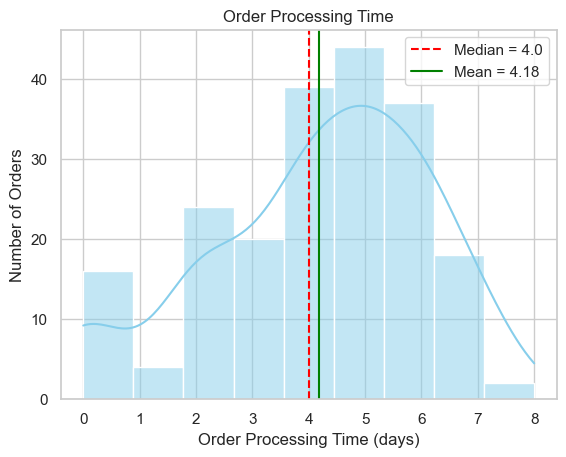

In [349]:
sns.histplot(data=data_unique_orders, x='order processing time', kde=True, color='skyblue')

median_value = data_unique_orders['order processing time'].median()
mean_value = data_unique_orders['order processing time'].mean()

plt.axvline(median_value, color='red', linestyle='--', label=f'Median = {median_value}')
plt.axvline(mean_value, color='green', linestyle='-', label=f'Mean = {mean_value:.2f}')
plt.legend()

plt.title('Order Processing Time')
plt.xlabel('Order Processing Time (days)')
plt.ylabel('Number of Orders')
plt.show()

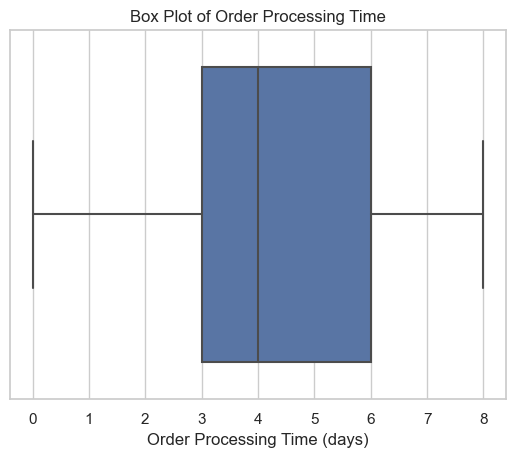

In [310]:
sns.boxplot(data=data_unique_orders, x='order processing time')
plt.title('Box Plot of Order Processing Time')
plt.xlabel('Order Processing Time (days)')
plt.show()

In [312]:
# KPI: Warehouse Efficiency

# Enter new column with warehouse time and calculate it.
# Go for statistics and a Plot.
# Dive deeper into analizing.


In [315]:
# Enter new column with warehouse time and calculate it.

data_unique_orders['warehouse time'] = data_unique_orders['order processing time'].apply(lambda x: max(x - 1, 0))

/var/folders/p1/0msy8v1j5pj97kvknyjtp3600000gn/T/ipykernel_9638/2785252468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique_orders['warehouse time'] = data_unique_orders['order processing time'].apply(lambda x: max(x - 1, 0))


In [290]:
data_unique_orders

,order id,ready to ship date,pickup date,row id,order date,on truck scan date,ship mode,order processing time,warehouse time
0,CA-2019-116540,2019-09-02,03/09/2019,3416,2019-09-02,03/09/2019,Express,0,0
2,CA-2019-129847,2019-09-04,04/09/2019,6937,2019-09-02,04/09/2019,Express,2,1
3,CA-2019-129630,2019-09-04,04/09/2019,9929,2019-09-04,04/09/2019,Express,0,0
5,CA-2019-106278,2019-09-05,06/09/2019,9069,2019-09-02,06/09/2019,Standard Processing,3,2
7,CA-2019-158099,2019-09-05,06/09/2019,870,2019-09-03,06/09/2019,Express,2,1
...,...,...,...,...,...,...,...,...,...
406,US-2020-165456,2020-12-03,04/12/2020,9289,2020-11-30,04/12/2020,Express,3,2
407,US-2020-110576,2020-12-04,07/12/2020,948,2020-11-28,07/12/2020,Standard Processing,6,5
412,CA-2020-105333,2020-12-04,07/12/2020,5585,2020-11-30,07/12/2020,Standard Processing,4,3
415,CA-2020-119305,2020-12-04,07/12/2020,956,2020-11-30,07/12/2020,Standard Processing,4,3


In [289]:
# Go for statistics and a Plot.

data_unique_orders['warehouse time'].describe()

count    204.000000
mean       3.254902
std        1.815024
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: warehouse time, dtype: float64

In [288]:
data_unique_orders['warehouse time'].median()

3.0

In [353]:
data_unique_orders['warehouse time'].mode()

0    4
Name: warehouse time, dtype: int64

In [352]:
data_unique_orders['warehouse time'].value_counts()

warehouse time
4    44
3    39
5    37
1    24
0    20
2    20
6    18
7     2
Name: count, dtype: int64

/Users/fabianbrockstedt/miniconda3/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


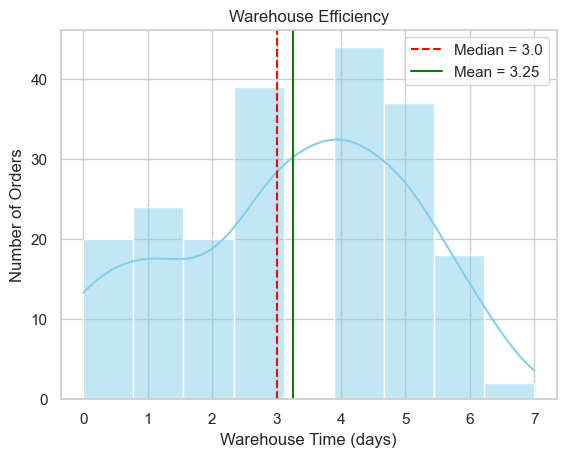

In [357]:

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot the distribution of Warehouse Time
sns.histplot(data=data_unique_orders, x='warehouse time', kde=True, color='skyblue')

# Calculate median and mean for Warehouse Time
median_value_warehouse = data_unique_orders['warehouse time'].median()
mean_value_warehouse = data_unique_orders['warehouse time'].mean()

# Add vertical lines for median and mean of Warehouse Time
plt.axvline(median_value_warehouse, color='red', linestyle='--', label=f'Median = {median_value_warehouse}')
plt.axvline(mean_value_warehouse, color='green', linestyle='-', label=f'Mean = {mean_value_warehouse:.2f}')

# Add legend to the plot
plt.legend()

# Add titles and labels
plt.title('Warehouse Efficiency')
plt.xlabel('Warehouse Time (days)')
plt.ylabel('Number of Orders')

# Show the plot
plt.show()

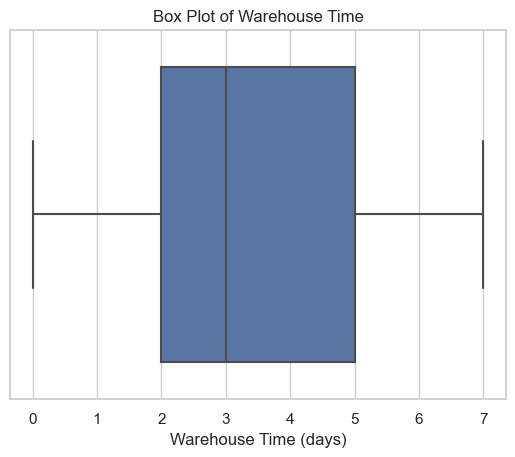

In [273]:
sns.boxplot(data=data_unique_orders, x='warehouse time')
plt.title('Box Plot of Warehouse Time')
plt.xlabel('Warehouse Time (days)')
plt.show()

In [223]:
#Add the warehousetime column to the merged data

merged_data['warehouse time'] = merged_data['order processing time'].apply(lambda x: max(x - 1, 0))

merged_data


,order id,ready to ship date,pickup date,row id,order date,on truck scan date,ship mode,order processing time,warehouse time
0,CA-2019-116540,2019-09-02,03/09/2019,3416,2019-09-02,03/09/2019,Express,0,0
1,CA-2019-116540,2019-09-02,03/09/2019,3417,2019-09-02,03/09/2019,Express,0,0
2,CA-2019-129847,2019-09-04,04/09/2019,6937,2019-09-02,04/09/2019,Express,2,1
3,CA-2019-129630,2019-09-04,04/09/2019,9929,2019-09-04,04/09/2019,Express,0,0
4,CA-2019-129630,2019-09-04,04/09/2019,9930,2019-09-04,04/09/2019,Express,0,0
...,...,...,...,...,...,...,...,...,...
413,CA-2020-105333,2020-12-04,07/12/2020,5586,2020-11-30,07/12/2020,Standard Processing,4,3
414,CA-2020-105333,2020-12-04,07/12/2020,5587,2020-11-30,07/12/2020,Standard Processing,4,3
415,CA-2020-119305,2020-12-04,07/12/2020,956,2020-11-30,07/12/2020,Standard Processing,4,3
416,CA-2020-142090,2020-12-07,09/12/2020,5066,2020-11-30,09/12/2020,Standard Processing,7,6


In [221]:
# Aggregate 'data' by 'Order ID', summing 'Quantity' for each 'Order ID'


data_aggregated = data.groupby('order id')['quantity'].sum().reset_index()

In [224]:
# Now, perform the merge

merged_data_quantity_data = pd.merge(merged_data, data_aggregated, on='order id', how='inner')

merged_data_quantity_data

,order id,ready to ship date,pickup date,row id,order date,on truck scan date,ship mode,order processing time,warehouse time,quantity
0,CA-2019-116540,2019-09-02,03/09/2019,3416,2019-09-02,03/09/2019,Express,0,0,3
1,CA-2019-116540,2019-09-02,03/09/2019,3417,2019-09-02,03/09/2019,Express,0,0,3
2,CA-2019-129847,2019-09-04,04/09/2019,6937,2019-09-02,04/09/2019,Express,2,1,2
3,CA-2019-129630,2019-09-04,04/09/2019,9929,2019-09-04,04/09/2019,Express,0,0,8
4,CA-2019-129630,2019-09-04,04/09/2019,9930,2019-09-04,04/09/2019,Express,0,0,8
...,...,...,...,...,...,...,...,...,...,...
413,CA-2020-105333,2020-12-04,07/12/2020,5586,2020-11-30,07/12/2020,Standard Processing,4,3,10
414,CA-2020-105333,2020-12-04,07/12/2020,5587,2020-11-30,07/12/2020,Standard Processing,4,3,10
415,CA-2020-119305,2020-12-04,07/12/2020,956,2020-11-30,07/12/2020,Standard Processing,4,3,5
416,CA-2020-142090,2020-12-07,09/12/2020,5066,2020-11-30,09/12/2020,Standard Processing,7,6,10


In [232]:
merged_data_quantity_test = merged_data_quantity_data.drop_duplicates(subset=['order id'], keep='first')


In [233]:
merged_data_quantity_test

,order id,ready to ship date,pickup date,row id,order date,on truck scan date,ship mode,order processing time,warehouse time,quantity
0,CA-2019-116540,2019-09-02,03/09/2019,3416,2019-09-02,03/09/2019,Express,0,0,3
2,CA-2019-129847,2019-09-04,04/09/2019,6937,2019-09-02,04/09/2019,Express,2,1,2
3,CA-2019-129630,2019-09-04,04/09/2019,9929,2019-09-04,04/09/2019,Express,0,0,8
5,CA-2019-106278,2019-09-05,06/09/2019,9069,2019-09-02,06/09/2019,Standard Processing,3,2,6
7,CA-2019-158099,2019-09-05,06/09/2019,870,2019-09-03,06/09/2019,Express,2,1,8
...,...,...,...,...,...,...,...,...,...,...
406,US-2020-165456,2020-12-03,04/12/2020,9289,2020-11-30,04/12/2020,Express,3,2,6
407,US-2020-110576,2020-12-04,07/12/2020,948,2020-11-28,07/12/2020,Standard Processing,6,5,34
412,CA-2020-105333,2020-12-04,07/12/2020,5585,2020-11-30,07/12/2020,Standard Processing,4,3,10
415,CA-2020-119305,2020-12-04,07/12/2020,956,2020-11-30,07/12/2020,Standard Processing,4,3,5


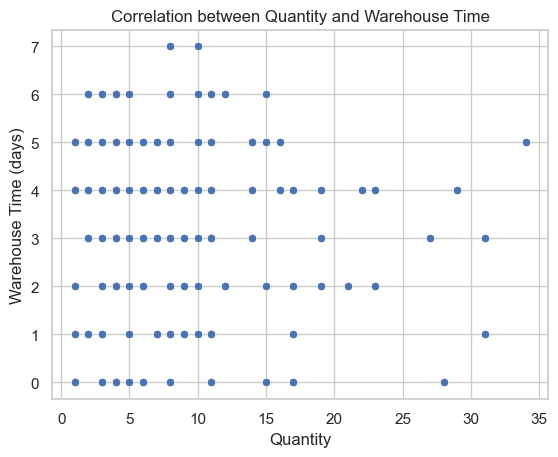

The Pearson correlation coefficient between Quantity and Warehouse Time is: 0.00


In [359]:
sns.scatterplot(data=merged_data_quantity_test, x='quantity', y='warehouse time')

# Adding titles and labels for clarity
plt.title('Correlation between Quantity and Warehouse Time')
plt.xlabel('Quantity')
plt.ylabel('Warehouse Time (days)')

# Show the plot
plt.show()

# Calculating and printing the Pearson correlation coefficient
correlation = merged_data_quantity_test[['quantity', 'warehouse time']].corr().iloc[0,1]
print(f"The Pearson correlation coefficient between Quantity and Warehouse Time is: {correlation:.2f}")


In [242]:
# KPI Pick-Up effiecency 

# Change the datetime

data2['pickup date'] = pd.to_datetime(data2['pickup date'],format='%d/%m/%Y')
data2['ready to ship date'] = pd.to_datetime(data2['ready to ship date'], format='%d/%m/%Y')



In [243]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 289
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order id            204 non-null    object        
 1   ready to ship date  204 non-null    datetime64[ns]
 2   pickup date         204 non-null    datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 6.4+ KB


In [302]:
#create a new dataframe

In [295]:
warehouse_time = data2

In [299]:
data2 = data2.drop(columns=['warehouse effiecency', 'warehouse efficency'])


In [300]:
warehouse_time = warehouse_time.drop(columns=['warehouse effiecency', 'warehouse efficency'])


In [296]:
# Add a new column to the new data frame called "Warehouse efficiency".
# Calculate the time.

warehouse_time[''] = (data2['pickup date'] - data2['ready to ship date']).dt.days



In [303]:
warehouse_time

,order id,ready to ship date,pickup date,day_of_week,warehouse efficiency
0,CA-2019-116540,2019-09-02,2019-09-03,Monday,1
2,CA-2019-129847,2019-09-04,2019-09-04,Wednesday,0
3,CA-2019-129630,2019-09-04,2019-09-04,Wednesday,0
4,CA-2019-106278,2019-09-05,2019-09-06,Thursday,1
5,CA-2019-158099,2019-09-05,2019-09-06,Thursday,1
...,...,...,...,...,...
283,US-2020-165456,2020-12-03,2020-12-04,Thursday,1
284,US-2020-110576,2020-12-04,2020-12-07,Friday,3
285,CA-2020-105333,2020-12-04,2020-12-07,Friday,3
288,CA-2020-119305,2020-12-04,2020-12-07,Friday,3


In [304]:
#check the day of the ready to ship and igore the Fridays column 

days_to_keep = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']

filtered_data = warehouse_time[warehouse_time['day_of_week'].isin(days_to_keep)]


In [306]:
filtered_data['warehouse efficiency'].describe()

count    173.000000
mean       1.473988
std        0.818155
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: warehouse efficiency, dtype: float64

In [323]:
filtered_data['warehouse efficiency'].median()

2.0

In [324]:
filtered_data['warehouse efficiency'].mode()

0    2
Name: warehouse efficiency, dtype: int64

/Users/fabianbrockstedt/miniconda3/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


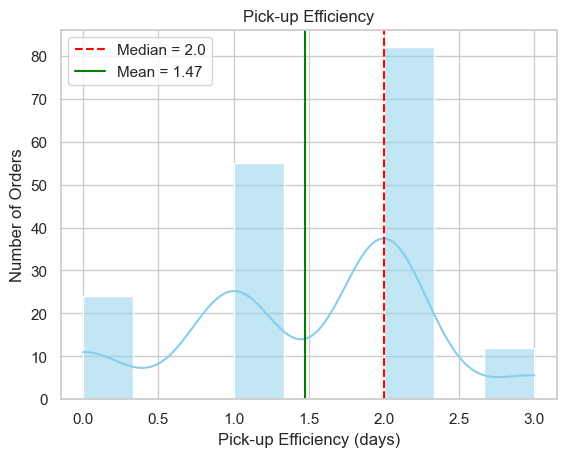

In [358]:
sns.histplot(data=filtered_data, x='warehouse efficiency', kde=True, color='skyblue')
median_value_warehouse = filtered_data['warehouse efficiency'].median()
mean_value_warehouse = filtered_data['warehouse efficiency'].mean()
plt.axvline(median_value_warehouse, color='red', linestyle='--', label=f'Median = {median_value_warehouse}')
plt.axvline(mean_value_warehouse, color='green', linestyle='-', label=f'Mean = {mean_value_warehouse:.2f}')
plt.legend()
plt.title('Pick-up Efficiency')
plt.xlabel('Pick-up Efficiency (days)')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
filtered_data[''].describe()

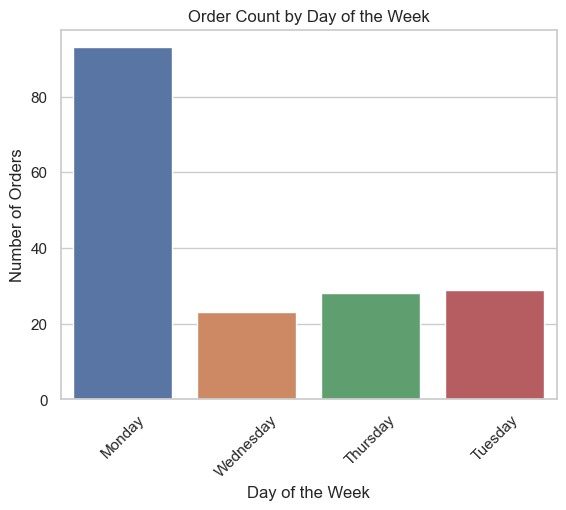

In [345]:
sns.countplot(data=filtered_data, x='day_of_week')
plt.title('Order Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()